In [1]:
import numpy as np
np.random.seed(0)
import gym

env = gym.make('Taxi-v3')
env = env.unwrapped
env.seed(0)
print('观察空间 = {}'.format(env.observation_space))
print('动作空间 = {}'.format(env.action_space))
print('状态数量 = {}'.format(env.observation_space.n))
print('动作数量 = {}'.format(env.action_space.n))

观察空间 = Discrete(500)
动作空间 = Discrete(6)
状态数量 = 500
动作数量 = 6


In [2]:
def play_qlearning(env, agent, train=False, render=False):
    '''
    qlearning算法
    :param env: 环境
    :param agent: 智能体
    :param train: 是否训练
    :param render: 是否render
    :return:
    '''
    # 轨迹回报
    episode_reward = 0
    # 状态
    observation = env.reset()
    i = 0
    while True:
        # 确实有时候这个策略不太好，死循环
        i = i+1
        if i > 10000:
            return 'drop'
        if render:
            env.render()
        # 动作
        action = agent.decide(observation)
        next_observation, reward, done, _ = env.step(action)
        episode_reward += reward
        if train:
            agent.learn(observation, action, reward, next_observation,done)
        if done:
            break
        observation = next_observation
    return episode_reward


In [3]:
class QLearningAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=.01):
        '''
        初始化
        :param env: 环境
        :param gamma: 折扣因子
        :param learning_rate: 学习率
        :param epsilon: epsilon贪心策略
        '''
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        # 动作价值
        self.q = np.zeros((env.observation_space.n, env.action_space.n))

    def decide(self, state):
        '''
        epsilon贪心策略
        :param state: 状态
        :return: 
        '''
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action

    def learn(self, state, action, reward, next_state, done):
        '''
        学习，也就是更新
        :param state: 状态 
        :param action: 动作 
        :param reward: 奖励
        :param next_state: 下一个状态 
        :param done: 是否完成
        :return: 
        '''
        # 注意！max
        u = reward + self.gamma * self.q[next_state].max() * (1. - done)
        td_error = u - self.q[state, action]
        self.q[state, action] += self.learning_rate * td_error

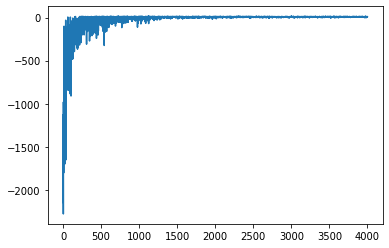

In [4]:
import matplotlib.pyplot as plt

agent = QLearningAgent(env)

# 训练
episodes = 4000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)

plt.plot(episode_rewards)

In [5]:
# 测试
agent.epsilon = 0. # 取消探索

episode_rewards = [play_qlearning(env, agent) for _ in range(100)]
# 死循环的都drop
episode_rewards = [e for e in episode_rewards if e != 'drop']
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards),len(episode_rewards), np.mean(episode_rewards)))


平均回合奖励 = 759 / 98 = 7.744897959183674
